# **Task Overview**
> **Objective:** Build a machine learning model to predict customer churn using historical data.

### **Deliverables:**

• Exploratory Data Analysis (EDA)

• Feature engineering

• Train/test split and model selection (Logistic Regression, XGBoost, etc.)

• Performance metrics (confusion matrix, AUC-ROC)

• Final report with visualizations


### **Mock Data (Python):**

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

# np.random.seed(42)

# n = 10000

# data = pd.DataFrame({

#   'CustomerID': np.arange(n),

#   'Gender': np.random.choice(['Male', 'Female'], size=n),

#   'SeniorCitizen': np.random.choice([0, 1], size=n),

#   'Tenure': np.random.randint(1, 72, size=n),

#   'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n), 2),

#   'TotalCharges': lambda df: df['Tenure'] * df['MonthlyCharges'],

#   'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),

#   'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),

#   'Churn': np.random.choice([0, 1], size=n, p=[0.73, 0.27])

# })

# data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges']).round(2)

In [2]:
import warnings
from pandas.errors import DtypeWarning, ParserWarning

# Capture/ignore import warnings related to encoding, dtype coercion, and date parsing
warnings.filterwarnings('ignore', '.*encoding.*')
warnings.filterwarnings('ignore', category=DtypeWarning)
warnings.filterwarnings('ignore', category=ParserWarning)

# Data Dictionary
This project uses a synthetic customer churn dataset. Below is a data dictionary describing each variable, its type, and expected values.

| Column Name    | Description                                      | Unit         | Expected Range         | Type         | Tag           |
|----------------|--------------------------------------------------|--------------|-----------------------|--------------|---------------|
| CustomerID     | Unique customer identifier                       | N/A          | 0 - 9999              | int          | identifier    |
| Gender         | Customer gender                                  | N/A          | Male, Female          | str          | categorical   |
| SeniorCitizen  | Whether the customer is a senior citizen         | 0 = No, 1 = Yes | 0, 1                | int          | ordinal       |
| Tenure         | Number of months the customer has stayed         | months       | 1 - 72                | int          | numerical     |
| MonthlyCharges | Monthly billing amount                           | USD          | 20.00 - 120.00        | float        | numerical     |
| TotalCharges   | Total amount charged to the customer             | USD          | 20.00 - 8640.00       | float        | numerical     |
| Contract       | Type of contract                                 | N/A          | Month-to-month, One year, Two year | str | categorical   |
| PaymentMethod  | Customer's payment method                        | N/A          | Electronic check, Mailed check, Bank transfer, Credit card | str | categorical   |
| Churn          | Whether the customer left (target variable)      | 0 = No, 1 = Yes | 0, 1                | int          | ordinal       |

- **numerical**: Quantitative variable (continuous or discrete)
- **categorical**: Qualitative variable (unordered)
- **ordinal**: Qualitative variable (ordered)
- **identifier**: Unique key

In [3]:
# load the data
data = pd.read_csv('/home/maimoon/Documents/GitHub Repos/Customer-Churn-Prediction/data/raw/customer_churn_dataset.csv')

In [4]:
data.head()

CustomerID  Gender  SeniorCitizen  Tenure  MonthlyCharges  TotalCharges  \
0           0    Male              0      55          111.88       6153.40   
1           1  Female              1      36           58.70       2113.20   
2           2    Male              0      37          118.86       4397.82   
3           3    Male              1      14           96.14       1345.96   
4           4    Male              1      27           28.05        757.35   

         Contract     PaymentMethod  Churn  
0        Two year      Mailed check      0  
1        Two year  Electronic check      0  
2        One year  Electronic check      0  
3  Month-to-month      Mailed check      1  
4        Two year      Mailed check      0

In [5]:
data['CustomerID'].nunique() == len(data)

True

In [6]:
# Display basic information about the dataset
print("Dataset shape:", data.shape)

print("Data types:\n", data.dtypes.value_counts())


Dataset shape: (10000, 9)
Data types:
 int64      4
object     3
float64    2
Name: count, dtype: int64


In [7]:
# Display descriptive statistics
print("\nDescriptive statistics:")
display(data.describe(include="all").T)


Descriptive statistics:


count unique               top  freq        mean  \
CustomerID      10000.0    NaN               NaN   NaN      4999.5   
Gender            10000      2              Male  5013         NaN   
SeniorCitizen   10000.0    NaN               NaN   NaN      0.4993   
Tenure          10000.0    NaN               NaN   NaN      35.955   
MonthlyCharges  10000.0    NaN               NaN   NaN   70.451038   
TotalCharges    10000.0    NaN               NaN   NaN  2541.80739   
Contract          10000      3          One year  3455         NaN   
PaymentMethod     10000      4  Electronic check  2516         NaN   
Churn           10000.0    NaN               NaN   NaN       0.267   

                        std   min        25%       50%        75%      max  
CustomerID       2886.89568   0.0    2499.75    4999.5    7499.25   9999.0  
Gender                  NaN   NaN        NaN       NaN        NaN      NaN  
SeniorCitizen      0.500025   0.0        0.0       0.0        1.0      1.0  
Tenure            20.501761   1.0       18.0      36.0       54.0     71.0  
MonthlyCharges    28.935692  20.0    45.5275    70.585    95.6125    120.0  
TotalCharges    1879.645307  21.2  1035.0575  2117.135  3717.3525  8384.39  
Contract                NaN   NaN        NaN       NaN        NaN      NaN  
PaymentMethod           NaN   NaN        NaN       NaN        NaN      NaN  
Churn              0.442414   0.0        0.0       0.0        1.0      1.0

In [8]:
data.isna().mean().sort_values(ascending=False)  # top 15 missing-value columns

CustomerID        0.0
Gender            0.0
SeniorCitizen     0.0
Tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
Contract          0.0
PaymentMethod     0.0
Churn             0.0
dtype: float64

In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
CustomerID        0
Gender            0
SeniorCitizen     0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
PaymentMethod     0
Churn             0
dtype: int64


In [10]:
# Explore the target variable distribution
print("\nChurn distribution:")
churn_counts = data['Churn'].value_counts(normalize=True) * 100
print(churn_counts.to_frame().rename(columns={'Churn': 'Percentage (%)'}))


Churn distribution:
       proportion
Churn            
0            73.3
1            26.7


In [11]:
data.duplicated().sum()

np.int64(0)

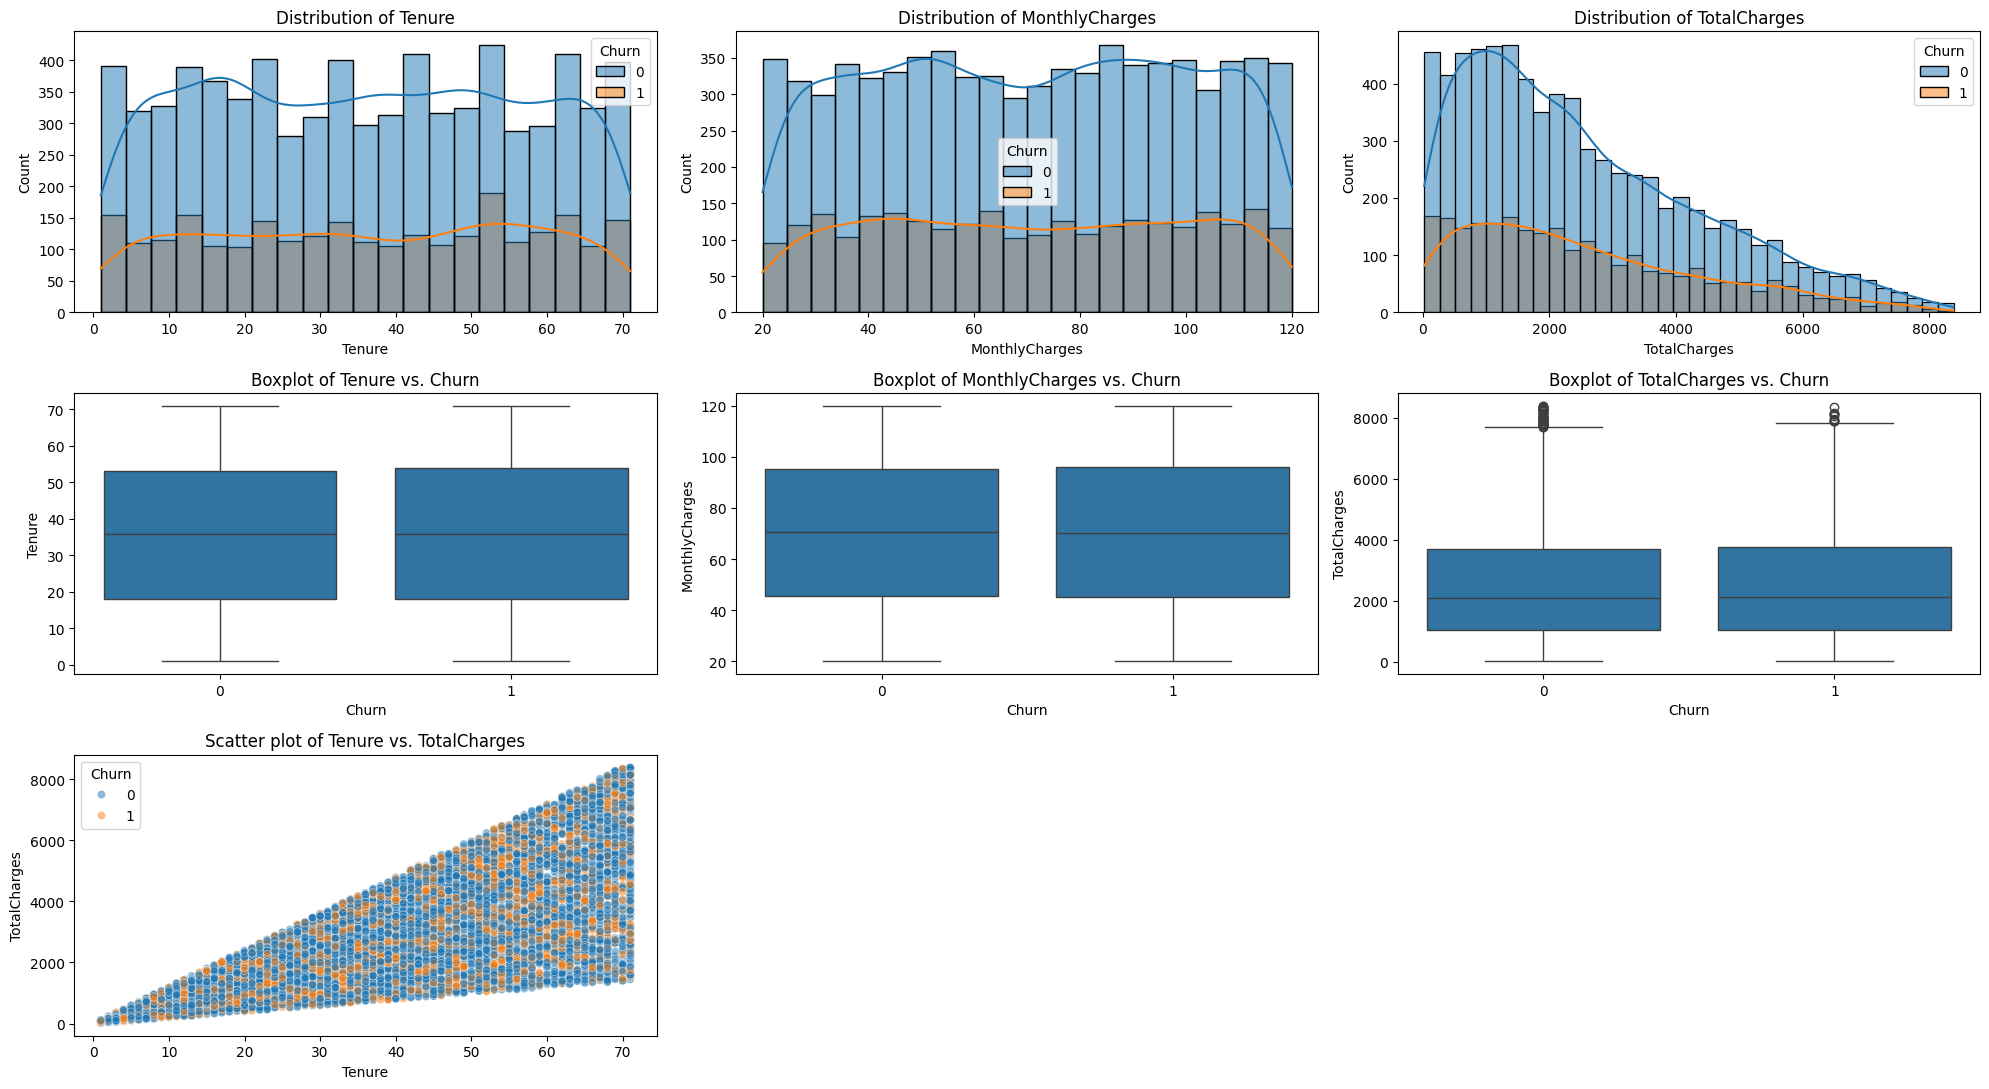

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualize the distribution of numerical features
numerical_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 11))

# Histograms
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=data, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature}')

# Box plots
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 4)
    sns.boxplot(data=data, y=feature, x='Churn')
    plt.title(f'Boxplot of {feature} vs. Churn')

# Scatter plot (Tenure vs. TotalCharges)
plt.subplot(3, 3, 7)
sns.scatterplot(data=data, x='Tenure', y='TotalCharges', hue='Churn', alpha=0.5)
plt.title('Scatter plot of Tenure vs. TotalCharges')

plt.tight_layout()
plt.show()

In [13]:
# Identify columns with a single unique value (uninformative features)
single_level_cols = [col for col in data.columns if data[col].nunique() == 1]
print("Columns with a single unique value:", single_level_cols)

Columns with a single unique value: []


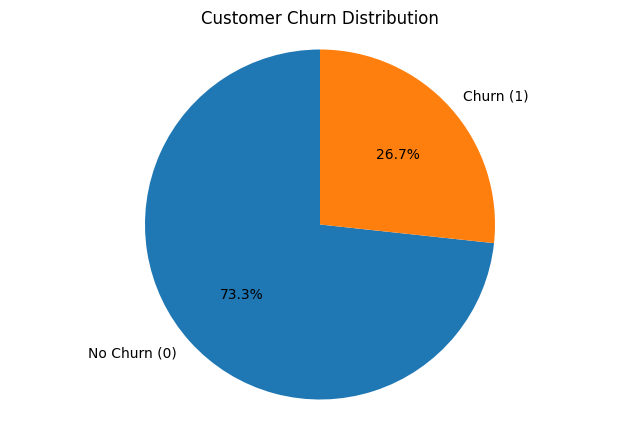

In [14]:
# Visualize the churn distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.pie(churn_counts, labels=['No Churn (0)', 'Churn (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()

In [15]:
from scipy.stats import zscore

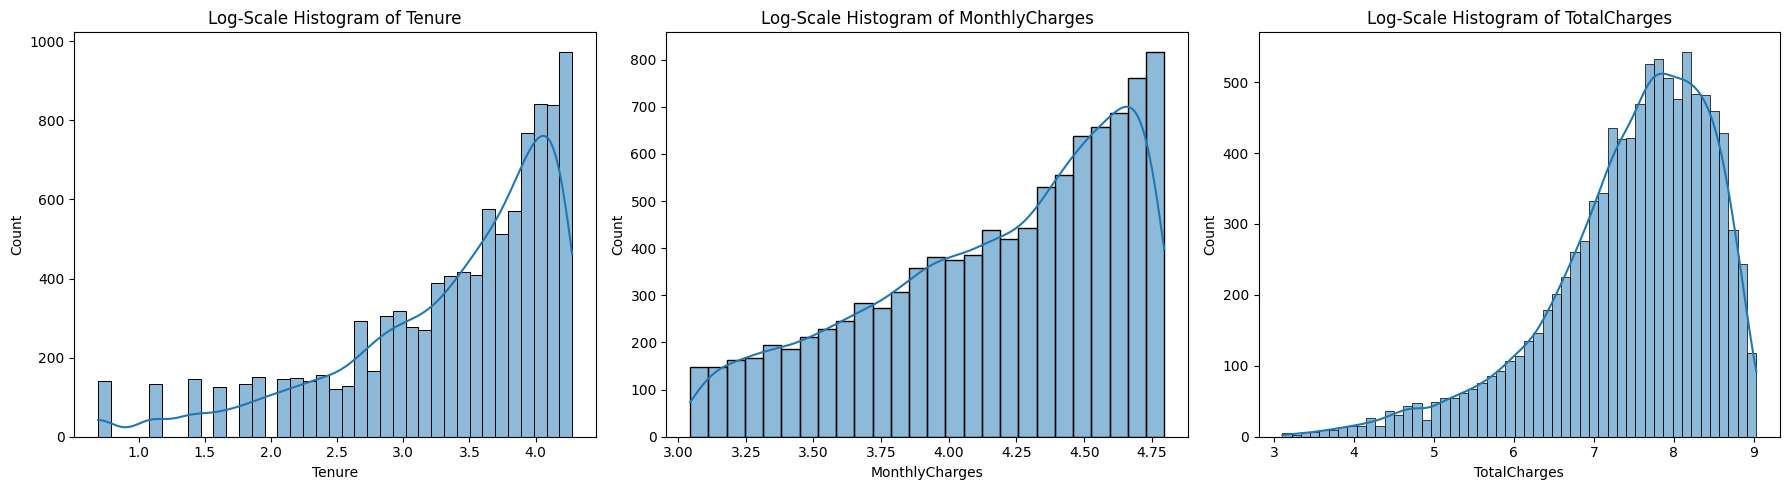

Number of outliers detected by Z-score (>3): 16


In [16]:
# Z-score method for outlier detection
z_scores = np.abs(zscore(data[numerical_features]))
outliers_zscore = (z_scores > 3).any(axis=1)# Log-scale histograms for numerical features
plt.figure(figsize=(18, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(np.log1p(data[feature]), kde=True)
    plt.title(f'Log-Scale Histogram of {feature}')
plt.tight_layout()
plt.show()
print(f"Number of outliers detected by Z-score (>3): {outliers_zscore.sum()}")

In [17]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

# Prepare a color list based on the Z-score outlier mask
colors = ['red' if is_outlier else 'gray' for is_outlier in outliers_zscore]

# Create a 1x3 subplot figure
fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=[f"{feat} (outliers in red)" for feat in numerical_features]
)

# Add a scatter trace for each numerical feature
for idx, feature in enumerate(numerical_features, start=1):
    fig.add_trace(
        go.Scatter(
            x=data.index,
            y=data[feature],
            mode='markers',
            marker=dict(color=colors, opacity=0.6)
        ),
        row=1,
        col=idx
    )
    fig.update_xaxes(title_text="Index", row=1, col=idx)
    fig.update_yaxes(title_text=feature, row=1, col=idx)

# Adjust layout and display
fig.update_layout(
    # height=600,
    # width=1600,
    showlegend=False,
    title_text="Z-score Outlier Visualization"
)
fig.show()

In [18]:
# IQR method for outlier detection
outliers_iqr = pd.Series(False, index=data.index)
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    mask = (data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))
    outliers_iqr = outliers_iqr | mask
print(f"Number of outliers detected by IQR: {outliers_iqr.sum()}")

Number of outliers detected by IQR: 62


In [19]:
# Prepare a color list based on the IQR outlier mask
colors_iqr = ['red' if is_outlier else 'gray' for is_outlier in outliers_iqr]

# Create a 1x3 subplot figure
fig_iqr = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=[f"{feat} (outliers in red)" for feat in numerical_features]
)

# Add a scatter trace for each numerical feature
for idx, feature in enumerate(numerical_features, start=1):
    fig_iqr.add_trace(
        go.Scatter(
            x=data.index,
            y=data[feature],
            mode='markers',
            marker=dict(color=colors_iqr, opacity=0.6)
        ),
        row=1,
        col=idx
    )
    fig_iqr.update_xaxes(title_text="Index", row=1, col=idx)
    fig_iqr.update_yaxes(title_text=feature, row=1, col=idx)

# Adjust layout and display
fig_iqr.update_layout(
    # height=600,
    # width=1600,
    showlegend=False,
    title_text="IQR Outlier Visualization"
)
fig_iqr.show()

In [20]:
import plotly.express as px

fig = px.bar(
    x=data["Churn"].value_counts(normalize=True).values,
    y=['No Churn (0)', 'Churn (1)'],
    orientation='h',
    labels={'x': 'Proportion', 'y': 'Churn'},
    title='Churn Distribution (Proportion)'
)
fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()

In [21]:
# Check class balance for the target variable 'Churn'
churn_counts = data['Churn'].value_counts(normalize=True)
print("Churn class distribution:")
print(churn_counts)

Churn class distribution:
Churn
0    0.733
1    0.267
Name: proportion, dtype: float64


In [22]:
# Assess imbalance
imbalance_threshold = 0.1  # If any class <10% or >90%, it's highly imbalanced
minority_class_pct = churn_counts.min()
if minority_class_pct < imbalance_threshold or (1 - minority_class_pct) < imbalance_threshold:
    print("Warning: The dataset is highly imbalanced. Stratified sampling is recommended.")
else:
    print("The dataset is moderately balanced. Stratified sampling is still a good practice for train/test split.")

The dataset is moderately balanced. Stratified sampling is still a good practice for train/test split.


In [23]:
# reference date
ref_date = pd.to_datetime('2024-06-01')

# compute StartMonth as Timestamp, then convert to datetime64 and to Period[M]
data['StartMonth'] = data['Tenure'].apply(lambda x: ref_date - pd.DateOffset(months=x))
data['StartMonth'] = pd.to_datetime(data['StartMonth']).dt.to_period('M')

# churn rate by month
churn_by_month = data.groupby('StartMonth')['Churn'].mean()

# compute StartQuarter from the period
data['StartQuarter'] = data['StartMonth'].dt.to_timestamp().dt.to_period('Q')
churn_by_quarter = data.groupby('StartQuarter')['Churn'].mean()

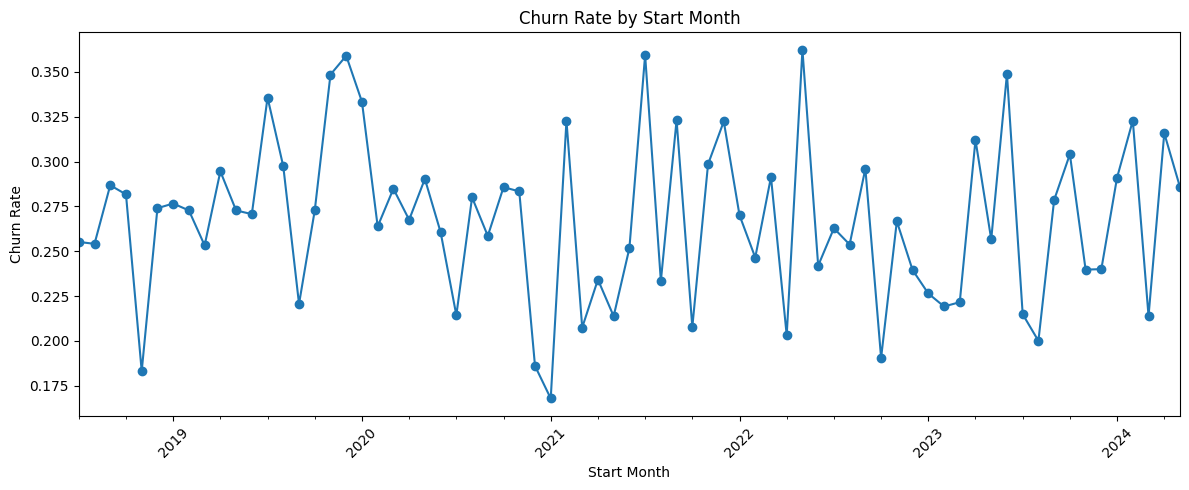

In [24]:
# Plot churn by month
plt.figure(figsize=(12, 5))
churn_by_month.plot(marker='o')
plt.title('Churn Rate by Start Month')
plt.ylabel('Churn Rate')
plt.xlabel('Start Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

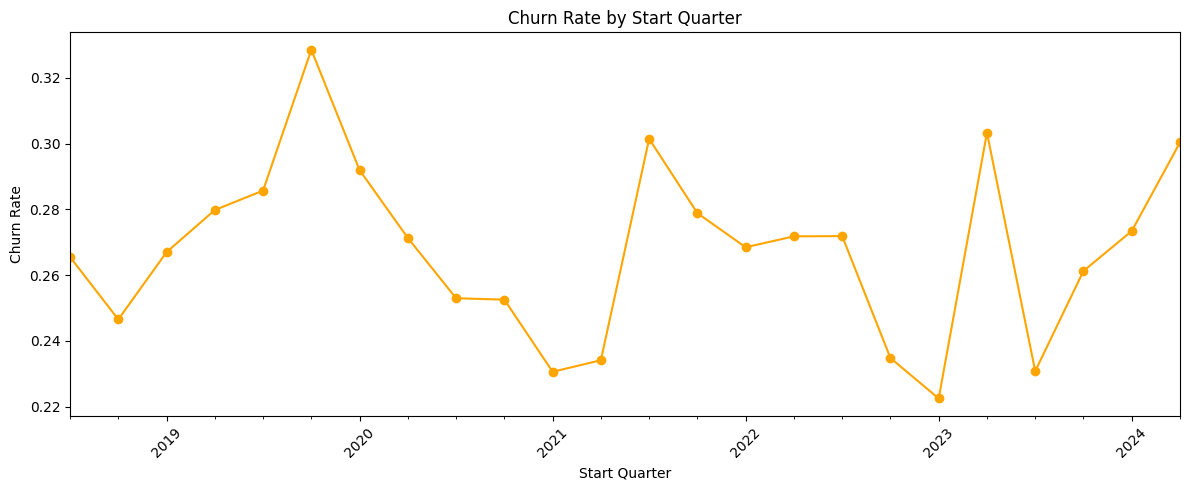

In [25]:
# Plot churn by quarter
plt.figure(figsize=(12, 5))
churn_by_quarter.plot(marker='o', color='orange')
plt.title('Churn Rate by Start Quarter')
plt.ylabel('Churn Rate')
plt.xlabel('Start Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Cohort analysis: Churn rate by customer tenure buckets

# Define tenure buckets (e.g., 0-12, 13-24, ..., 61-72 months)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']
data['TenureBucket'] = pd.cut(data['Tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calculate churn rate per tenure bucket
churn_by_tenure_bucket = data.groupby('TenureBucket')['Churn'].mean()

/tmp/ipykernel_6715/434967019.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [27]:
fig = px.bar(
    x=churn_by_tenure_bucket.index.astype(str),
    y=churn_by_tenure_bucket.values,
    labels={'x': 'Tenure Bucket', 'y': 'Churn Rate'},
    title='Churn Rate by Customer Tenure Bucket',
)
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()


## **Univariate Analysis**

**Numerical:**

In [28]:
num_cols = data.select_dtypes("number").columns

for col in num_cols:
    fig = px.histogram(data, x=col, nbins=30, title=f'Distribution of {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Count')
    fig.show()

**Categorical:**

In [29]:
import plotly.express as px

cat_cols = data.select_dtypes("object").columns
for col in cat_cols:
    fig = px.bar(
        data[col].value_counts(normalize=True).head(10).sort_values(),
        orientation='h',
        labels={'value': 'Proportion', 'index': col},
        title=f'Distribution of {col}'
    )
    fig.show()

In [30]:
from scipy.stats import boxcox

# Select skewed numerical features
skewed_feats = ['MonthlyCharges', 'TotalCharges']

# Apply log1p and Box-Cox transforms
for feat in skewed_feats:
    # Log transform
    data[f'{feat}_log'] = np.log1p(data[feat])
    # Box-Cox transform (add a small constant to ensure positivity)
    transformed, lam = boxcox(data[feat] + 1e-6)
    data[f'{feat}_boxcox'] = transformed
    print(f'Box-Cox λ for {feat}: {lam:.4f}')

Box-Cox λ for MonthlyCharges: 0.7552
Box-Cox λ for TotalCharges: 0.4053


In [31]:
# Plotly comparison of original, log1p and Box-Cox distributions
fig = make_subplots(
    rows=len(skewed_feats),
    cols=3,
    subplot_titles=[
        f"{feat} (original)" for feat in skewed_feats
    ] + [
        f"{feat} (log1p)" for feat in skewed_feats
    ] + [
        f"{feat} (Box-Cox)" for feat in skewed_feats
    ],
    horizontal_spacing=0.05,
    vertical_spacing=0.1
)

for i, feat in enumerate(skewed_feats, start=1):
    fig.add_trace(
        go.Histogram(x=data[feat], nbinsx=30, marker_color='blue', opacity=0.75),
        row=i, col=1
    )
    fig.add_trace(
        go.Histogram(x=data[f"{feat}_log"], nbinsx=30, marker_color='green', opacity=0.75),
        row=i, col=2
    )
    fig.add_trace(
        go.Histogram(x=data[f"{feat}_boxcox"], nbinsx=30, marker_color='red', opacity=0.75),
        row=i, col=3
    )

fig.update_layout(
    height=400 * len(skewed_feats),
    width=1500,
    title_text="Distribution Comparison (original vs log1p vs Box-Cox)",
    showlegend=False
)
fig.show()

In [32]:
# Group rare categories into "Other" based on a minimum frequency threshold
rare_threshold = 0.05  # e.g. categories under 5% frequency are “rare”

for col in cat_cols:
    freq = data[col].value_counts(normalize=True)
    rare_labels = freq[freq < rare_threshold].index
    data[col] = data[col].where(~data[col].isin(rare_labels), other='Other')
    print(f"Column '{col}' – grouped rare categories {list(rare_labels)} into 'Other'")
    print(data[col].value_counts(normalize=True), "\n")

Column 'Gender' – grouped rare categories [] into 'Other'
Gender
Male      0.5013
Female    0.4987
Name: proportion, dtype: float64 

Column 'Contract' – grouped rare categories [] into 'Other'
Contract
One year          0.3455
Two year          0.3326
Month-to-month    0.3219
Name: proportion, dtype: float64 

Column 'PaymentMethod' – grouped rare categories [] into 'Other'
PaymentMethod
Electronic check    0.2516
Bank transfer       0.2508
Credit card         0.2492
Mailed check        0.2484
Name: proportion, dtype: float64 



In [33]:
for col in cat_cols:
    counts = data[col].value_counts(normalize=True).sort_values()
    fig = px.bar(
        x=counts.values,
        y=counts.index.astype(str),
        orientation='h',
        labels={'x': 'Proportion', 'y': col},
        title=f'Distribution of {col} after grouping rare categories'
    )
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()

## **Bivariate Analysis With the Target**
**Numerical vs. churn:**

In [34]:
# Box plots of numerical features vs Churn using Plotly
for col in num_cols.drop('Churn', errors='ignore'):
    fig = px.box(data,
                 x='Churn',
                 y=col,
                 title=f'{col} vs Churn',
                 labels={'Churn':'Churn', col:col})
    fig.update_layout(xaxis_title='Churn', yaxis_title=col)
    fig.show()

**Categorical vs. churn (chi-square / Cramér’s V):**

In [35]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.values.sum()
    r, k = confusion_matrix.shape
    return (chi2 / (n * (min(r, k) - 1))) ** 0.5

# Compute Cramér’s V for each categorical feature vs. Churn
strong_sep_vars = []
for col in cat_cols:
    conf_mat = pd.crosstab(data[col], data['Churn'])
    cv = cramers_v(conf_mat)
    print(f"{col} vs Churn ⇒ Cramér’s V = {cv:.4f}")
    if cv > 0.25:
        strong_sep_vars.append(col)

print("Categorical variables with strong separation (Cramér’s V > 0.25):", strong_sep_vars)

# Note: Beware of data leakage (e.g., features derived from churn information like 'service_cancel_date')

Gender vs Churn ⇒ Cramér’s V = 0.0005
Contract vs Churn ⇒ Cramér’s V = 0.0081
PaymentMethod vs Churn ⇒ Cramér’s V = 0.0068
Categorical variables with strong separation (Cramér’s V > 0.25): []


## **Multivariate Patterns**

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px

# 1. Correlation heatmap of numerical features
corr = data[numerical_features].corr()
fig_corr = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    labels={'x': 'Features', 'y': 'Features', 'color': 'Correlation'},
    title='Correlation Matrix of Numerical Features'
)
fig_corr.show()

In [37]:
# Pair plot for top driver variables with Plotly
fig_top_drivers = px.scatter_matrix(
    data,
    dimensions=['Tenure', 'MonthlyCharges', 'TotalCharges'],
    color='Churn',
    title='Scatter Matrix of Top Driver Variables vs. Churn'
)
fig_top_drivers.update_traces(diagonal_visible=False)
fig_top_drivers.show()


In [38]:
import plotly.express as px

# Interaction plot: Tenure vs. Contract type, colored by churn rate
interaction_df = data.groupby(['Contract', 'TenureBucket'])['Churn'].mean().reset_index()

fig = px.line(
    interaction_df,
    x='TenureBucket',
    y='Churn',
    color='Contract',
    markers=True,
    labels={'Churn': 'Churn Rate', 'TenureBucket': 'Tenure Bucket', 'Contract': 'Contract Type'},
    title='Churn Rate by Tenure Bucket and Contract Type'
)
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()

/tmp/ipykernel_6715/5413966.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

